# 실습 1 복습

### 국내 주식 데이터 수집 : FinanceDatareader

In [ ]:
!pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr
print(fdr.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxopt as opt
from cvxopt import solvers

0.9.31


In [ ]:
symbols = ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']

a = {}
for symbol in symbols:
  a[symbol] = fdr.DataReader(symbol, '2010')['Close']

a = pd.DataFrame(a)

In [ ]:
a

,KS200,US500,IXIC,JP225,USD/KRW
Date,,,,,
2010-01-01,NaN,NaN,NaN,NaN,1166.08
2010-01-04,223.49,1132.99,2308.42,NaN,1150.00
2010-01-05,222.84,1136.52,2308.71,NaN,1140.20
2010-01-06,224.67,1137.14,2301.09,NaN,1129.20
2010-01-07,221.31,1141.69,2300.05,NaN,1138.20
...,...,...,...,...,...
2021-04-19,431.96,4163.26,13914.76,29685.37,1115.33
2021-04-20,434.60,4134.94,13786.27,29100.38,1117.28
2021-04-21,426.75,4173.42,13950.22,28508.55,1116.35


#### Efficient Frontier 구하기

In [ ]:
holding_periods=1
n_term=252 # dailiy return을 annualize
data = a

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

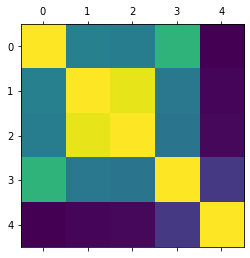

In [ ]:
plt.matshow(corr_mat)
plt.show()

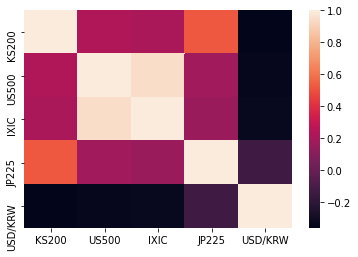

In [ ]:
import seaborn as sns

sns.heatmap(corr_mat)

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
        n = len(cov_mat)
        
        # Objective function
        # min (1/2)*w.T*P*w
        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        
        # Constraints Gw <= h
        # exp_rets*w >= target_ret and w >= 0
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        # Constraints Aw = b
        # sum(w) = 1
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        # Solve
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        # Put weights into a labeled series
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

In [ ]:
max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))
    
    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

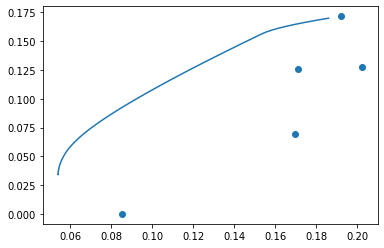

In [ ]:
plt.plot(risks, rets)


var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)

In [ ]:
max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

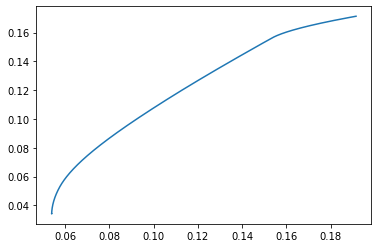

In [ ]:
plt.plot(risks, rets)

# 최소 분산 포트폴리오
![](https://ift.world/wp-content/uploads/2018/06/wsi-imageoptim-1-1.png)

#### 최소 분산 포트폴리오 : 자산들로 구성되는 포트폴리오 중 최소 분산을 갖는 포트폴리오.
#### Efficient Frontier 상에서 분산이 가장 작은 점이 된다.

#실습 1

### 앞서 구한 Efficient Frontier를 바탕으로, Efficient frontier 상에서 variance가 가장 작은 점을 구하시오. 
#### A) 구한 minimum variance portfolio의 risk, return, portfolio weight를 프린트하시오.
#### B) Efficient frontier와 Minimum variance portfolio를 plotting하시오.

In [ ]:
# Efficient Frontier

max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)
    weights.append(_w)

# ToDo  "???"
min_risk_idx = "???"
min_risk = "???"
min_risk_ret = "???"
min_risk_weight = "???"
print("Risk of minimum variance portfolio : ", min_risk)
print("Return of minimum variance portfolio : ", min_risk_ret)
print("Weight of minimum variance portfolio : ",)
print(min_risk_weight)

Risk of minimum variance portfolio :  ???
Return of minimum variance portfolio :  ???
Weight of minimum variance portfolio : 
???


In [ ]:
min_risk_idx = np.argmin(risks)
min_risk = risks[min_risk_idx] #np.array(risks).min()
min_risk_ret = rets[min_risk_idx]
min_risk_weight = weights[min_risk_idx]
print("Risk of minimum variance portfolio : ", min_risk)
print("Return of minimum variance portfolio : ", min_risk_ret)
print("Weight of minimum variance portfolio : ")
print(min_risk_weight)


Risk of minimum variance portfolio :  0.05395379501994789
Return of minimum variance portfolio :  0.03412901030777812
Weight of minimum variance portfolio : 
KS200      1.787006e-01
US500      1.707082e-01
IXIC       7.716157e-07
JP225      2.009244e-03
USD/KRW    6.485813e-01
dtype: float64


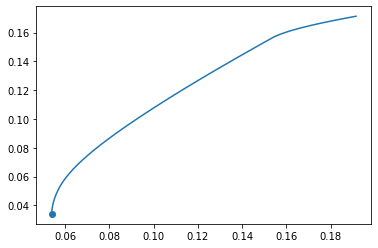

In [ ]:
plt.plot(risks, rets)
plt.scatter(min_risk, min_risk_ret)
plt.show()

# 탄젠시 포트폴리오

![대체 텍스트](https://www.researchgate.net/profile/Teodosii_Rachev/publication/24071755/figure/fig2/AS:667097013161996@1536059730503/The-Efficient-frontier-and-the-tangent-portfolio.png)

#### 앞서서는 주어진 자산들로 구성되는 포트폴리오들을 분석하여 efficient frontier를 구하고, minimum variance portfolio를 구하는 방법을 살펴보았다.
#### 이제 앞선 구성자산들에 더하여, risk-free asset이 존재할 시 어떤 portfolio들을 만들 수 있는 지 알아보자.
#### Risk free asset : 한국의 경우 국고채 3년 금리 사용 --> 1%
#### Efficient frontier 상의 포트폴리오 중, Sharpe ratio가 가장 큰 포트폴리오 --> Tangency portfolio

#실습 2

### 앞서 구한 Efficient Frontier를 바탕으로, Efficient frontier 상에서 Sharpe ratio가 가장 커지는 tangency portfolio 점을 구하시오.
#### a) 구한 tangency portfolio의 risk, return, portfolio weight를 프린트하시오.
#### b) tangency portfolio와 risk-free rate를 연결한 직선과, efficint frontier를 plotting 하시오

In [ ]:
# Efficient Frontier

max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)
    weights.append(_w)


rf_rate = 0.01

slopes = []

# ToDo
for i in "???":
  slope_ = "???"
  slopes.append(slope_)

max_tangency_idx = "???"
max_tangency = "???"
max_tangency_risk = "???"
max_tangency_return = "???"
max_tangency_weight = "???"

print("Risk of tangency portfolio : ", max_tangency_risk)
print("Return of tangency portfolio : ", max_tangency_return)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return - rf_rate) / max_tangency_risk)
print("Weight of minimum variance portfolio : ")
print(min_risk_weight)


Risk of tangency portfolio :  ???
Return of tangency portfolio :  ???


TypeError: ignored

In [ ]:
rf_rate = 0.01

slopes = []

# ToDo
for i in range(len(rets)):
  slope_ = (rets[i] - rf_rate) / risks[i]
  slopes.append(slope_)

max_tangency_idx = np.argmax(slopes)
max_tangency = slopes[max_tangency_idx]
max_tangency_risk = risks[max_tangency_idx]
max_tangency_return = rets[max_tangency_idx]
max_tangency_weight = weights[max_tangency_idx]

print("Risk of tangency portfolio : ", max_tangency_risk)
print("Return of tangency portfolio : ", max_tangency_return)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return - rf_rate) / max_tangency_risk)
print("Weight of minimum variance portfolio : ")
print(max_tangency_weight)

Risk of tangency portfolio :  0.10217204940518798
Return of tangency portfolio :  0.10979428869424997
Sharpe ratio of tangency portfolio :  0.9767278749444633
Weight of minimum variance portfolio : 
KS200      1.185474e-02
US500      1.280412e-08
IXIC       4.574737e-01
JP225      2.394520e-01
USD/KRW    2.912195e-01
dtype: float64


In [ ]:
min_risk_ret

0.03412901030777812

In [ ]:
print((min_risk_ret - rf_rate) / min_risk)
print(min_risk_weight)

0.4472161837523588
KS200      1.787006e-01
US500      1.707082e-01
IXIC       7.716157e-07
JP225      2.009244e-03
USD/KRW    6.485813e-01
dtype: float64


In [ ]:
# y = ax + b
# E[r_p] = slope * risk + risk-free rate

ys = []
for i in range(len(risks)):
    ys.append(max_tangency * risks[i] + rf_rate)

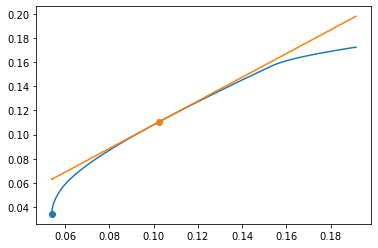

In [ ]:
plt.plot(risks, rets)
plt.plot(risks, ys)
plt.scatter(min_risk, min_risk_ret)
plt.scatter(max_tangency_risk, max_tangency_return)
plt.show()

# 백테스팅

#### 우리가 세운 전략을 실제로 historical data에 적용하면 어떻게 되는가?
#### 먼저 생각해야 할 것.
##### 1) 이전 몇 달 치의 데이터를 사용하여 Tangency portfolio weight를 구성할 것인가? (Lookback period)
##### 2) 리밸런싱을 얼마의 주기로 할 것인가?

#실습 3

### 5개 asset으로 tangency portfolio를 구성하는 backtesting을 진행하시오.

#### A) 리밸런싱 시점에서 tangency portfolio를 구성할 때, 이전 6달(120일)의 데이터를 바탕으로 만든다.
#### B) 리밸런싱은 3달(60일) 1분기마다 진행한다.
#### C) return과 covariance를 구할 때는 월평균으로 구하여 연평균 수익률로 변화시켜준다.
#### D) 시작 자산은 10000원에서 시작하여, 각 날짜마다 portfolio value가 어떻게 되는 지를 구한다.

In [ ]:
# 2015년부터의 데이터를 data에 저장한다
symbols = ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']

data = {}
for symbol in symbols:
  data[symbol] = fdr.DataReader(symbol, '2015')['Close']

data = pd.DataFrame(data)

In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]
    
    returns = result
    avg_rets = returns.mean()*12
    cov_mat = returns.cov()*12

    return returns, cov_mat, avg_rets

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
        n = len(cov_mat)
        
        # Objective function
        # min (1/2)*w.T*P*w
        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        
        # Constraints Gw <= h
        # exp_rets*w >= target_ret and w >= 0
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        # Constraints Aw = b
        # sum(w) = 1
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        # Solve
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        # Put weights into a labeled series
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    minus_cnt = 0
    for i in range(100):
        try:
            target_ret = min_rets + (i * step)
            # Constraints Gx <= h
            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = ??
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(??)
            cov_queue.append(??)
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights

SyntaxError: ignored

In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = 0.01):
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    step = (max_rets - min_rets)/100
    for i in range(100):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights

In [ ]:
data = data.dropna()

In [ ]:
ret = (data - data.shift(1)) / data.shift(1)

In [ ]:
data.shape

(1420, 5)

In [ ]:
def back_test(data, ret):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.
    total_days = data.shape[0]
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 60 # 3개월에 한번 = 분기당 한번
    window_size = 120 # 지난 6개월

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = (total_days - window_size) // rebalance_period
    w = []
    rebalancing_date=[]
    original_weights = []
    
    rebal = 60
    for i in range(window_size, total_days):
        # 리밸런싱을 할 때 마다 Tangency portfolio weight를 새로 구해야 한다.
        # 이때 리밸런싱 시점 이전의 총 120일 간의 데이터를 사용한다.
        
        if rebal % rebalance_period == 0:
            #print('rebalance')
            _returns, _cov_mat, _avg_rets= create_data(data[(i-window_size):i])
            rebalancing_date.append(data.index[i:i+1]) # rebalance_period 씩 늘려가자
            rebal = 0
            _target_ret = _avg_rets.quantile(0.7)
            _min_ret = _avg_rets.min()
            _max_ret = _avg_rets.max()
            _w = np.asarray(tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret).values) #np.array([0.0, 0.0, 1.0, 0.0, 0.0])
            w.append(_w)
            print(n_rebalance)
            n_rebalance = n_rebalance - 1
            plt.hist(_w)
            plt.show()
            plt.close()
            

        rebal = rebal + 1
        
    
    price = data
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 data를 저장한다.
    portfolio_value = 10000
    port_each_money = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    rebal = 60
    j = 0
    for i in range(window_size, total_days):
        
        if i == window_size: # 초기화
            port_each_money = portfolio_value * w[j]
            rebal = 1
            # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
            portfolio_value = port_each_money.sum()
            # port에 portfolio_value를 저장하여 준다.
            port.append(portfolio_value)
            j = j+1


        else:
            #각 날마다 자산의 가격이 바뀌므로, port_each_money 변화한다.
            port_each_money = port_each_money * (1+ret.iloc[i])
            portfolio_value = port_each_money.sum()
            if rebal % rebalance_period == 0:
                rebal = 0
                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_each_money = portfolio_value * w[j]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                j = j+1
            
            else:
                # 리밸런싱 날짜가 아닌 평범함 날짜. 
                # port_each_money 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_each_money.sum()
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
            
        rebal = rebal + 1
        port_date.append(data.index[i:i+1][0])
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, rebalancing_date

In [ ]:
data

,KS200,US500,IXIC,JP225,USD/KRW
Date,,,,,
2015-01-05,244.26,2020.58,4652.57,17408.71,1109.93
2015-01-06,239.93,2002.61,4592.74,16883.19,1099.00
2015-01-07,240.53,2025.90,4650.47,16885.33,1098.74
2015-01-08,243.94,2062.14,4736.19,17167.10,1095.51
2015-01-09,246.05,2044.81,4704.07,17197.73,1085.82
...,...,...,...,...,...
2021-04-16,432.43,4185.47,14052.34,29683.37,1116.50
2021-04-19,431.96,4163.26,13914.76,29685.37,1115.33
2021-04-20,434.60,4134.94,13786.27,29100.38,1117.28


In [ ]:
ret

,KS200,US500,IXIC,JP225,USD/KRW
Date,,,,,
2015-01-06,-0.017727,-0.008893,-0.012860,-0.030187,-0.009847
2015-01-07,0.002501,0.011630,0.012570,0.000127,-0.000237
2015-01-08,0.014177,0.017888,0.018433,0.016687,-0.002940
2015-01-09,0.008650,-0.008404,-0.006782,0.001784,-0.008845
2015-01-13,0.000975,-0.010651,-0.009050,-0.006397,-0.006484
...,...,...,...,...,...
2021-04-16,-0.000532,0.003609,0.000967,0.001372,-0.000161
2021-04-19,-0.001087,-0.005306,-0.009791,0.000067,-0.001048
2021-04-20,0.006112,-0.006802,-0.009234,-0.019706,0.001748


21


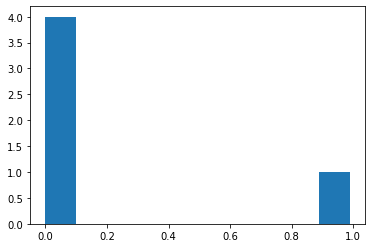

20


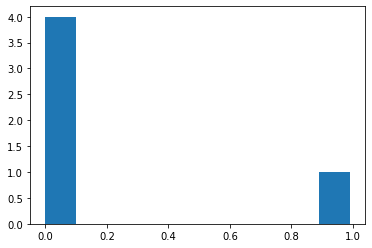

19


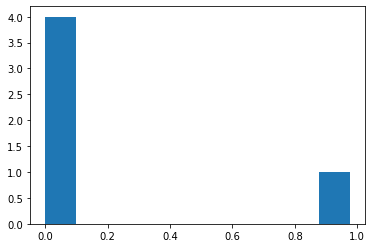

18


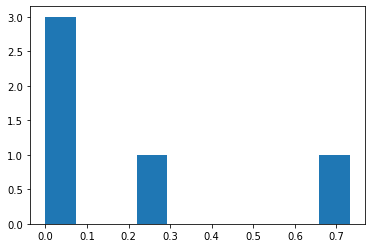

17


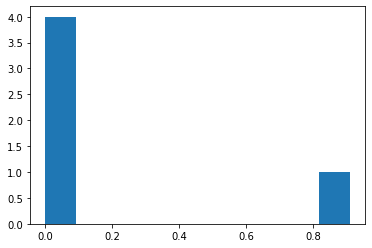

16


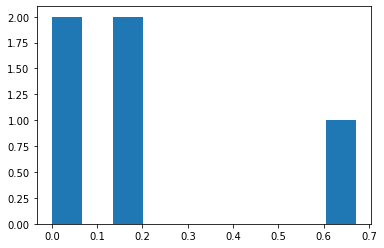

15


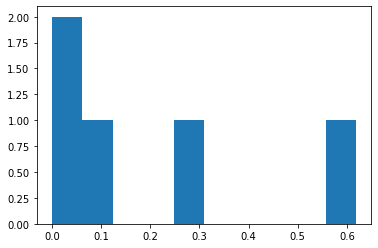

14


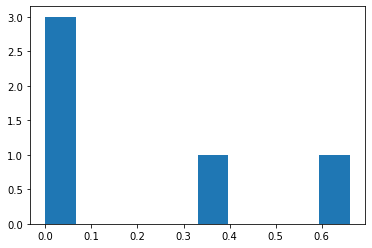

13


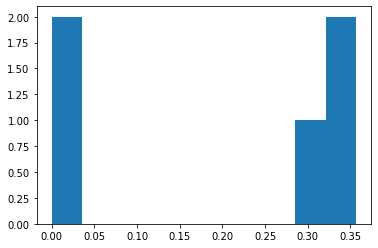

12


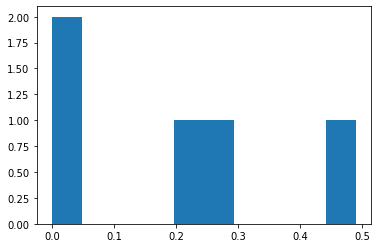

11


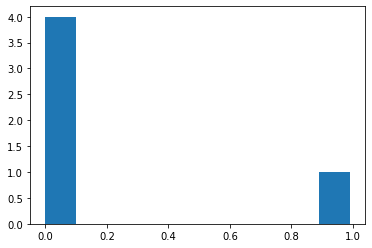

10


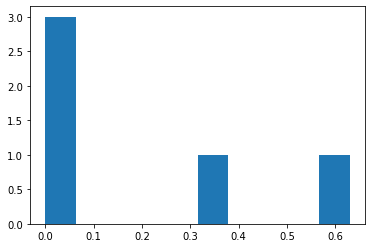

9


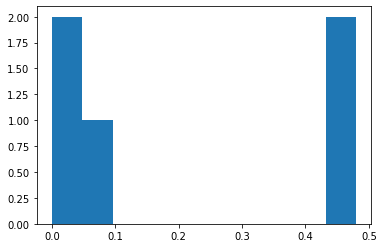

8


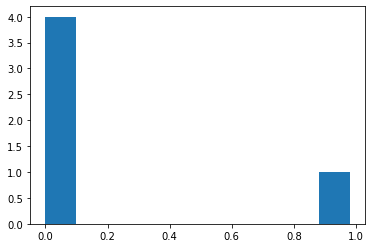

7


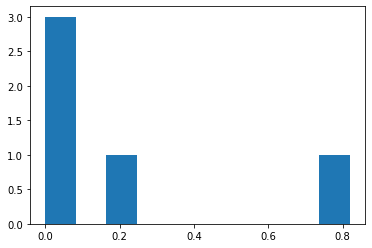

6


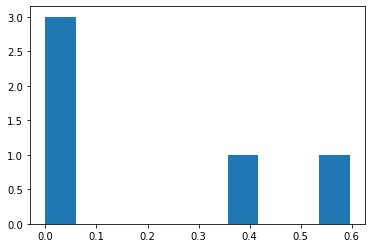

5


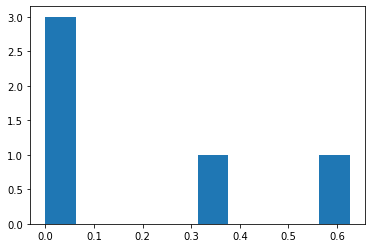

4


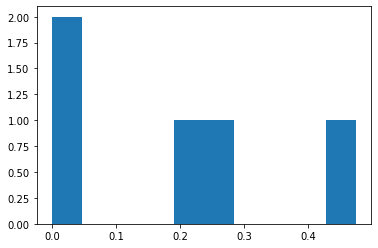

3


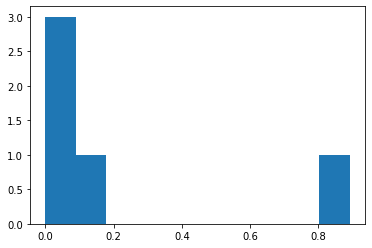

2


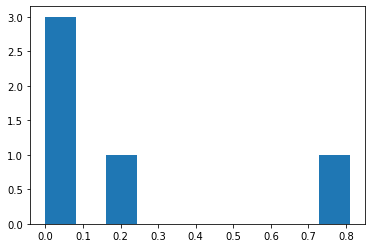

1


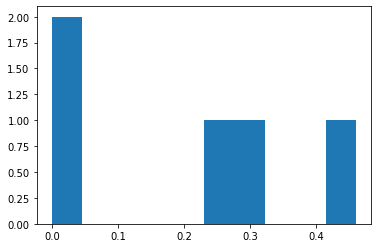

0


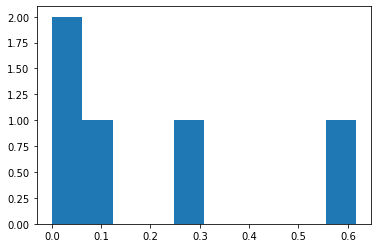

In [ ]:
data = data.dropna()
ret = data.pct_change(1).iloc[1:]#(data - data.shift(1))/data.shift(1)
w, portfolio, rebalancing_date = back_test(data[1:], ret)

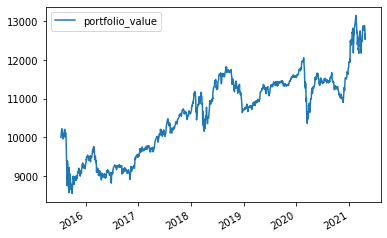

In [ ]:
portfolio.plot()

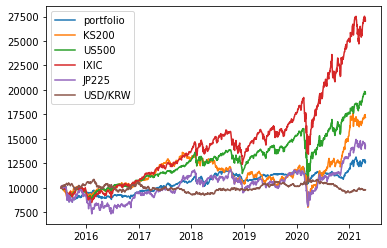

In [ ]:
# Backtest Result Plotting
plt.plot(portfolio, label="portfolio")

for symbol in ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']:
  plt.plot(data[121:][symbol] * 10000 / data[121:][symbol][0], label='{}'.format(symbol))

plt.legend()
plt.show()

#실습 4

### 앞서 구한 리밸런싱 포트폴리오의 Sharpe ratio plotting 하시오.

In [ ]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return 
    
# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()

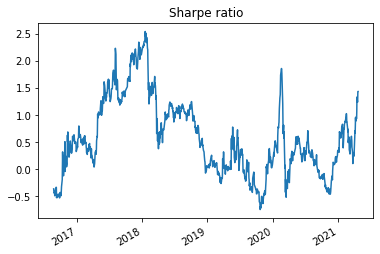

In [ ]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    rf_rate = 0.01
    return (y.mean()*252 - rf_rate) / (y.std()*np.sqrt(252))
# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'][252:].plot()
plt.title('Sharpe ratio')
plt.show()